In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
%matplotlib inline

In [24]:
df= pd.read_csv('/content/sample_data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [25]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [26]:
df.describe() #Droping features which have no correlation

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [0]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True) #These features have very less correction

In [28]:
def corrcof(a,b):
    return np.array(np.cov(a,b)/ (np.std(a) * np.std(b)))
def convert(d):
        switcher = {
            'Yes': 1,
            'No':  0,
            'Married' : 2,
            'Single' : 1,
            'Divorced' : 0}
        return switcher.get(d)
df["Attrition"] = df["Attrition"].apply(convert)
df["OverTime"] = df["OverTime"].apply(convert)
df["MaritalStatus"] = df["MaritalStatus"].apply(convert)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,1,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,1,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,2,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [29]:
#Logistic Regression

df.Attrition.value_counts()/1470*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

In [30]:
df.groupby("Attrition").mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,1.239254,6832.739659,14265.779400,2.645580,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,1.215190,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


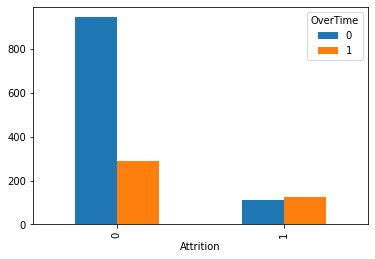

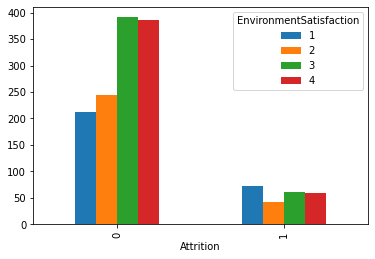

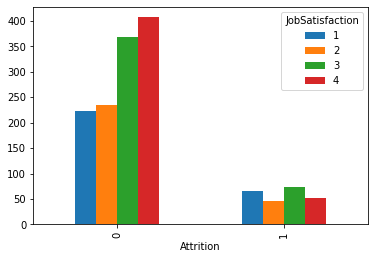

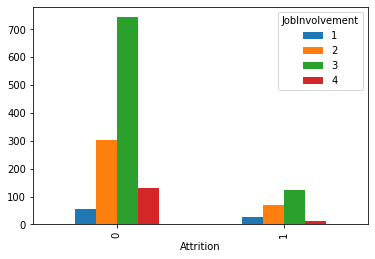

In [31]:
pd.crosstab(df.Attrition, df.OverTime).plot.bar()
pd.crosstab(df.Attrition, df.EnvironmentSatisfaction).plot.bar()
pd.crosstab(df.Attrition, df.JobSatisfaction).plot.bar()
pd.crosstab(df.Attrition, df.JobInvolvement).plot.bar()

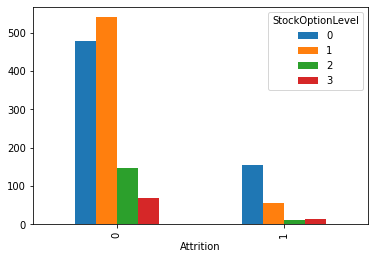

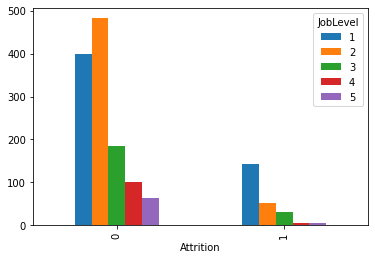

In [32]:
pd.crosstab(df.Attrition,df.StockOptionLevel).plot.bar()
pd.crosstab(df.Attrition, df.JobLevel).plot.bar()

In [35]:
x_attr = ['JobLevel','StockOptionLevel','JobSatisfaction','EnvironmentSatisfaction','OverTime','Age','TotalWorkingYears','YearsAtCompany','MonthlyIncome']
df_y = df['Attrition']
df_x = df[x_attr]
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.5, random_state=0)
logr = LogisticRegression(max_iter=1000)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
accuracy_score(y_test,y_pred)

0.8639455782312925

In [36]:
confusion_matrix(y_test, y_pred)
p = pd.DataFrame(y_pred)
p[0].value_counts()

0    713
1     22
Name: 0, dtype: int64

In [37]:
logr.score(X_test, y_test)*100

86.39455782312925

In [38]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.99      0.93       623\n           1       0.77      0.15      0.25       112\n\n    accuracy                           0.86       735\n   macro avg       0.82      0.57      0.59       735\nweighted avg       0.85      0.86      0.82       735\n'

In [39]:
acc1 = cross_val_score(logr,df_x, df_y, cv=10, scoring='accuracy') #Cross Validation to check Overfitting.
acc1.mean()*100

84.62585034013605

In [40]:
#K-NN Model

knn = KNeighborsClassifier(n_neighbors = 10,metric ='euclidean')
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.5, random_state=0)
knn.fit(X_train, y_train)
y_predi = knn.predict(X_test)
confusion_matrix(y_test,y_predi)
knn.score(X_test, y_test)

0.8448979591836735

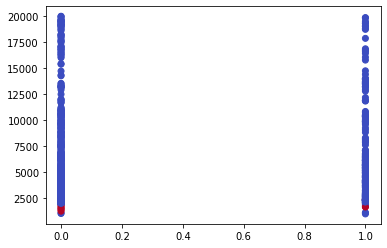

In [41]:
plt.scatter(X_test['OverTime'],X_test['MonthlyIncome'],c=y_predi, cmap = 'coolwarm')

In [42]:
df_y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [43]:
classification_report(y_test,y_predi)

'              precision    recall  f1-score   support\n\n           0       0.85      0.99      0.92       623\n           1       0.42      0.04      0.08       112\n\n    accuracy                           0.84       735\n   macro avg       0.63      0.52      0.50       735\nweighted avg       0.79      0.84      0.79       735\n'

In [44]:
acc2 = cross_val_score(knn, df_x, df_y, scoring='accuracy', cv=10) #Cross Validation to check Overfitting.
acc2.mean()*100

83.53741496598641

In [0]:
def logi_reg(x_var, y_var, t_size) :
    X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size = t_size, random_state =2)
    lr = LinearRegression(max_iter = 1000).fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    score = accuracy_score(y_pred, y_test)      #This gives us the accuracy score of these predictions
    c_report = classification_report(y_test, y_pred)      #This report displays the F1-Measure, Precision, Recall
    
    return lr

def knn_class(x_var, y_var, t_size, k):
    X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size = t_size, random_state = 2)
    knn = KNeighborsClassifier(n_neighbours = k, metric = 'euclidean').fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_pred, y_test)             #This gives us the accuracy score of these predictions
    c_report = classification_report(y_test, y_pred)   #This report displays the F1-Measure, Precision, Recall
    
    return knn

In [48]:
df["Attrition"].value_counts()/1470*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

In [49]:
classification_report(y_test,y_predi)

'              precision    recall  f1-score   support\n\n           0       0.85      0.99      0.92       623\n           1       0.42      0.04      0.08       112\n\n    accuracy                           0.84       735\n   macro avg       0.63      0.52      0.50       735\nweighted avg       0.79      0.84      0.79       735\n'

In [50]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.99      0.93       623\n           1       0.77      0.15      0.25       112\n\n    accuracy                           0.86       735\n   macro avg       0.82      0.57      0.59       735\nweighted avg       0.85      0.86      0.82       735\n'